In [12]:
json_name = 'data.json'
pkl_name = 'casos.pkl'
csv_name = 'casos.csv'

In [14]:
import requests
import gzip
import json

# URL del archivo JSON comprimido
url = 'https://datarepo.eng.ucsd.edu/mcauley_group/gdrive/goodreads/goodreads_reviews_dedup.json.gz'

# Realizar la solicitud GET al servidor
response = requests.get(url, stream=True)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Descomprimir el contenido del archivo
    with gzip.GzipFile(fileobj=response.raw) as f:
        # Leer las primeras 500 filas del JSON
        primeras_500_filas = [json.loads(next(f)[:-1].decode('utf-8')) for _ in range(500000)]

    # Guardar las primeras 500 filas en un nuevo archivo JSON
    #with open(json_name, 'w', encoding='utf-8') as file:
    #    json.dump(primeras_500_filas, file, indent=2)

    print("Las primeras 500 filas del archivo JSON fueron descargadas exitosamente.")
else:
    print(f"Error al descargar el archivo. Código de estado: {response.status_code}")

Las primeras 500 filas del archivo JSON fueron descargadas exitosamente.


In [15]:
import pandas as pd
# Read eoo.json only user_id, book_id, rating
df = pd.DataFrame(primeras_500_filas)
df = df[['user_id', 'book_id', 'rating']]

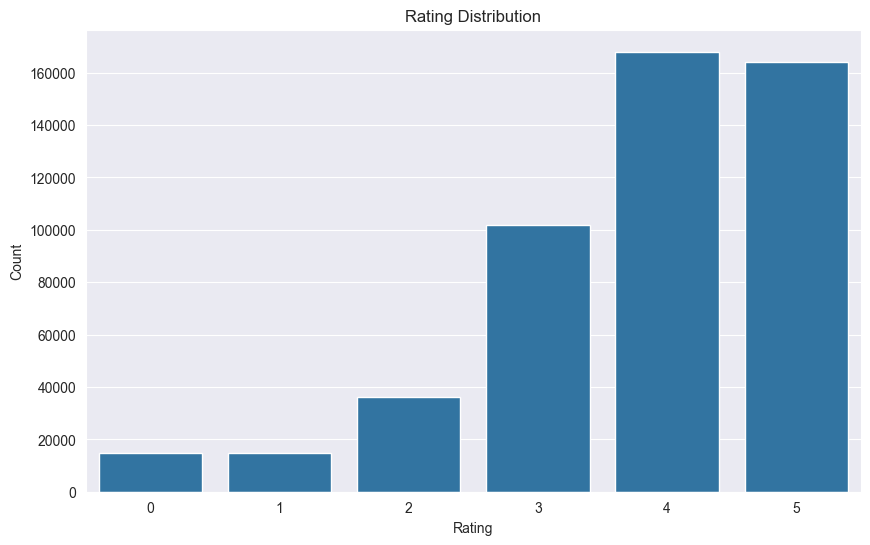

In [4]:
# Plot rating distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

In [5]:
# Give me unique users
unique_users = df['user_id'].unique()

In [6]:
# Make a database with unique users, list of books rated and list of rating for each book
df_aux = pd.DataFrame(columns=['user_id', 'books', 'ratings'])

for user in unique_users:
    # Filter by user
    user_df = df[df['user_id'] == user]
    # Get list of books rated by user
    books = user_df['book_id'].tolist()
    # Get list of ratings for each book
    ratings = user_df['rating'].tolist()
    # Create a dictionary with books and ratings
    user_dict = dict(zip(books, ratings))
    # Save user, books and ratings in df_aux using pd.concat
    df_aux = pd.concat([df_aux, pd.DataFrame({'user_id': [user], 'books': [books], 'ratings': [ratings]})])

df_aux = df_aux.reset_index(drop=True)

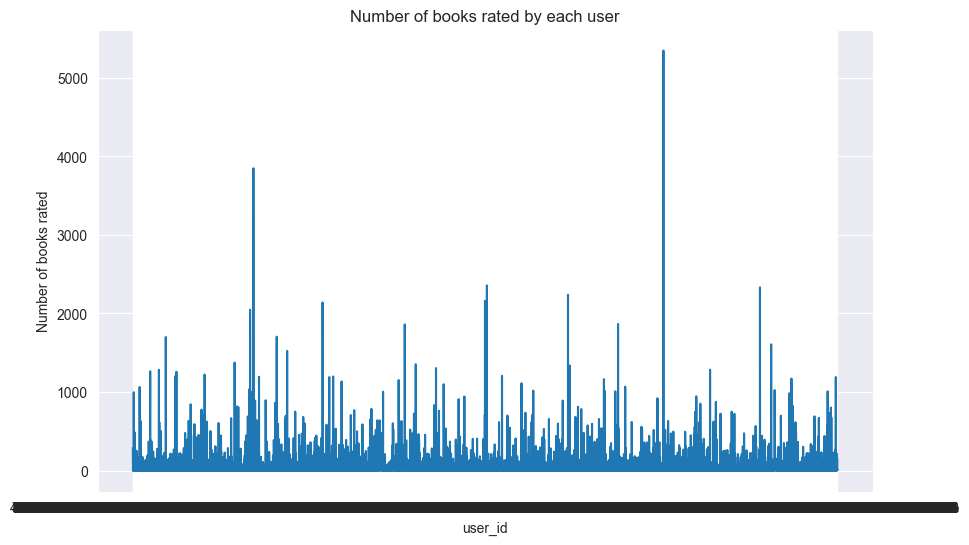

In [7]:
# Plot how many books each user has rated
# x: each user
# y: number of books rated
plt.figure(figsize=(10, 6))
plt.xlabel('user_id')
plt.ylabel('Number of books rated')
plt.title('Number of books rated by each user')
plt.plot(df_aux['user_id'], df_aux['books'].apply(lambda x: len(x)))
plt.show()

In [8]:
# Remove users that have rated less than 10 books and more than 50
df_aux = df_aux[df_aux['books'].apply(lambda x: len(x) >= 10 and len(x) <= 20)]
df_aux = df_aux.reset_index(drop=True)
# Print len of df_aux
print(f'len(df_aux) = {len(df_aux)}')

len(df_aux) = 1601


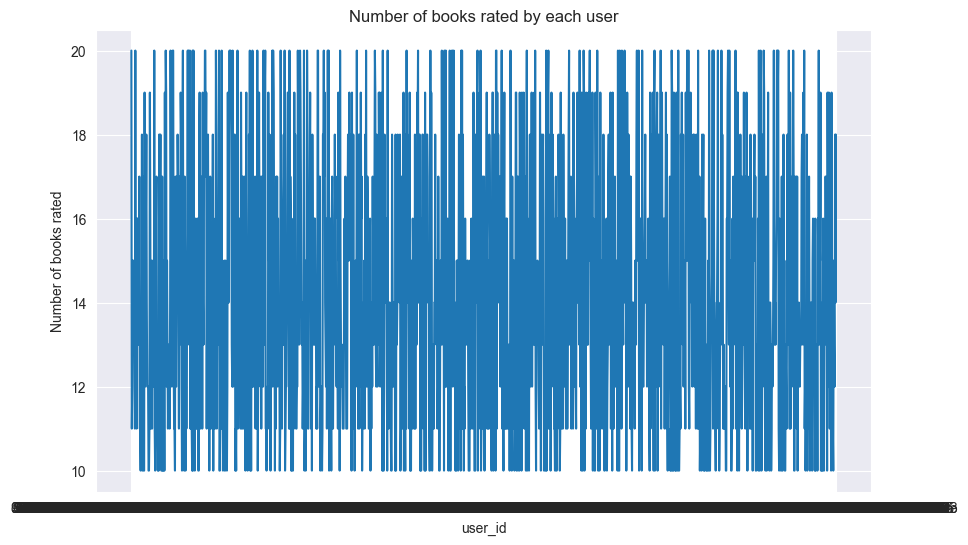

In [9]:
# Plot how many books each user has rated
# x: each user
# y: number of books rated
plt.figure(figsize=(10, 6))
plt.xlabel('user_id')
plt.ylabel('Number of books rated')
plt.title('Number of books rated by each user')
plt.plot(df_aux['user_id'], df_aux['books'].apply(lambda x: len(x)))
plt.show()

In [10]:
# For each user get 3 last books and their ratings and put them in a new column "llibres_recomanata" i "puntuacions_llibres". Then remove the 3 books from the list of books rated by the user.
df_aux['llibres_recomanats'] = df_aux['books'].apply(lambda x: x[-3:])
df_aux['puntuacions_llibres'] = df_aux['ratings'].apply(lambda x: x[-3:])
df_aux['books'] = df_aux['books'].apply(lambda x: x[:-3])
df_aux['ratings'] = df_aux['ratings'].apply(lambda x: x[:-3])

# Change "books" and "ratings" columns to "llibres_usuari" and "val_llibres"
df_aux = df_aux.rename(columns={'books': 'llibres_usuari', 'ratings': 'val_llibres'})

In [11]:
df_aux.to_pickle(pkl_name)
df_aux.to_csv(csv_name, index=False)